#Digital Currency Prediction Using Machine Learning

Importing the libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Loading the dataset

In [22]:
train_data = pd.read_csv('/content/hackathon_train_data.csv')
test_data = pd.read_csv('/content/hackathon_test_data.csv')
test_output = pd.read_csv('/content/hackathon_testoutput.csv')

EDA

In [23]:
train_data.describe()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,841999.000000,8.419990e+05,830923.000000,830923.000000,830923.000000,830923.000000,8.309230e+05,8.309230e+05,830923.000000
mean,420999.000000,1.585594e+09,14307.616524,14317.499302,14297.695239,14307.627340,6.114705e+00,8.616651e+04,14307.701941
std,243064.318991,1.823366e+07,12447.677088,12458.296835,12436.822674,12447.963132,1.621027e+01,2.417540e+05,12447.074467
min,0.000000,1.553999e+09,3858.270000,3927.050000,3850.000000,3865.000000,1.700000e-07,9.133420e-04,3875.980373
25%,210499.500000,1.569800e+09,8138.000000,8142.130000,8134.110000,8137.375000,3.363347e-01,3.261311e+03,8138.245451
50%,420999.000000,1.585605e+09,9660.860000,9666.620000,9656.000000,9661.010000,1.633883e+00,1.923569e+04,9661.540746
75%,631498.500000,1.601385e+09,11773.990000,11780.330000,11768.090000,11774.365000,5.563671e+00,7.273635e+04,11774.694138
max,841998.000000,1.617149e+09,61763.560000,61781.830000,61660.880000,61781.800000,1.098349e+03,1.390067e+07,61716.205341


In [24]:
train_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841999 entries, 0 to 841998
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         841999 non-null  int64  
 1   Timestamp          841999 non-null  int64  
 2   Open               830923 non-null  float64
 3   High               830923 non-null  float64
 4   Low                830923 non-null  float64
 5   Close              830923 non-null  float64
 6   Volume_(BTC)       830923 non-null  float64
 7   Volume_(Currency)  830923 non-null  float64
 8   Weighted_Price     830923 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 57.8 MB


In [27]:
train_data.isnull().sum()

Unnamed: 0               0
Timestamp                0
Open                 11076
High                 11076
Low                  11076
Close                11076
Volume_(BTC)         11076
Volume_(Currency)    11076
Weighted_Price       11076
dtype: int64

Inference:
1. The columns “Open,” “High,” “Low,” “Close,” “Volume_(BTC),” “Volume_(Currency),” and “Weighted_Price” each have 11,076 missing values.
2. The “Timestamp” and “Unnamed: 0” columns do not have any missing values, suggesting they are complete.

In [30]:
# Handling the NaN values and droping the unnecessary colums , missing values removed.

train_data=train_data.dropna(axis=0)
train_data = train_data.drop(['Unnamed: 0','Timestamp'],axis=1)
train_data

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,9089.59,9097.45,9083.93,9093.11,3.314381,3.012682e+04,9089.728028
1,17899.60,17899.83,17884.05,17885.74,1.615787,2.891070e+04,17892.645125
2,8838.41,8850.07,8831.21,8842.43,37.134733,3.282185e+05,8838.585448
3,18188.88,18188.88,18153.12,18153.12,6.858622,1.246142e+05,18168.984860
4,9697.70,9706.46,9697.70,9706.46,9.919014,9.623150e+04,9701.720669
...,...,...,...,...,...,...,...
841994,33400.48,33500.00,33358.12,33460.86,46.087818,1.540624e+06,33428.002150
841995,58718.68,58731.23,58698.34,58698.50,0.207983,1.220906e+04,58702.294657
841996,7164.47,7168.00,7162.49,7162.49,1.081980,7.752069e+03,7164.703329
841997,18931.76,18956.46,18931.76,18945.14,1.500852,2.844346e+04,18951.548055


The dataset now contains a total of 830,923 rows.


Now , Splitting the dataset into features and target variables. The shape of both dataframes (x and y) are then printed to verify the dimensions of the data.

In [32]:
x=pd.DataFrame(train_data.drop('Weighted_Price',axis=1))
y=pd.DataFrame(train_data['Weighted_Price'])
print(x.shape)
print(y.shape)

(830923, 6)
(830923, 1)


 Standardizing the features and target variables by using the StandardScaler in scikit-learn.

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y)

Split the standardized features (x_scaled) and target variables (y_scaled) into training and validation sets using the train_test_split function from scikit-learn.
The split ratio is 80% for training data and 20% for validation data, with a random seed of 42 for reproducibility.

In [34]:
x_train,x_val,y_train,y_val=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)

Cleaning the test data

In [40]:
x_test=pd.read_csv('/content/hackathon_test_data.csv')
y_test=pd.read_csv('/content/hackathon_testoutput.csv')


In [56]:
x_test=x_test.dropna(axis=0)
y_test=y_test.dropna(axis=0)


In [57]:
x_test_scaled=scaler.fit_transform(x_test)
y_test_scaled=scaler.fit_transform(y_test)

#Linear Regression


Import the LinearRegression class from scikit-learn and create a linear regression model with an intercept.

The model is then trained on the training data x_train and y_train using the fit method.

In [58]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X=x_train,y=y_train)

LinearRegression()

In [59]:
y_pred=model.predict(x_val)

In [60]:
y_lr_test=model.predict(x_test_scaled)


 Print the evaluation metrics for the model.

 The metrics include the Mean Squared Error and R2 score for both the validation data (y_val versus y_pred, model predictions on validation data) and the test data (y_test_scaled versus y_lr_test, model predictions on test data).

In [61]:
print("Model metrics: ")
print('Mean Squared Error: ',mean_squared_error(y_val,y_pred))
print('R2 score: ',r2_score(y_val,y_pred))
print("Model evaluation: ")
print('Mean Squared Error: ',mean_squared_error(y_test_scaled,y_lr_test))
print('R2 score: ',r2_score(y_test_scaled,y_lr_test))

Model metrics: 
Mean Squared Error:  2.560075330008137e-07
R2 score:  0.9999997450288299
Model evaluation: 
Mean Squared Error:  2.4807587714686573e-07
R2 score:  0.9999997519241228


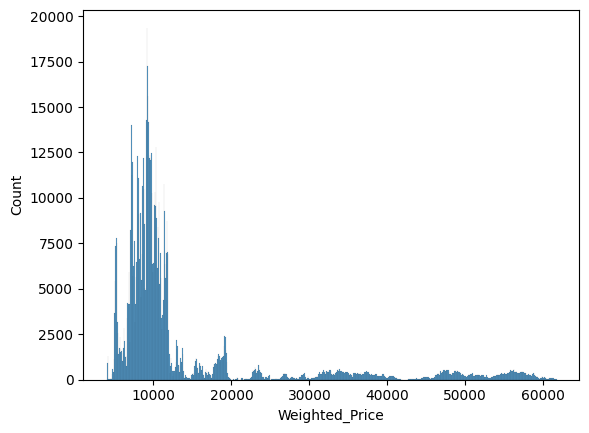

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in train_data.columns:
    if col == 'Weighted_Price':
        sns.histplot(data=train_data, x=col)
        plt.show()
    elif col.startswith('Volume_'):
        sns.lmplot(data=train_data, x=col, y='Weighted_Price')
        plt.show()

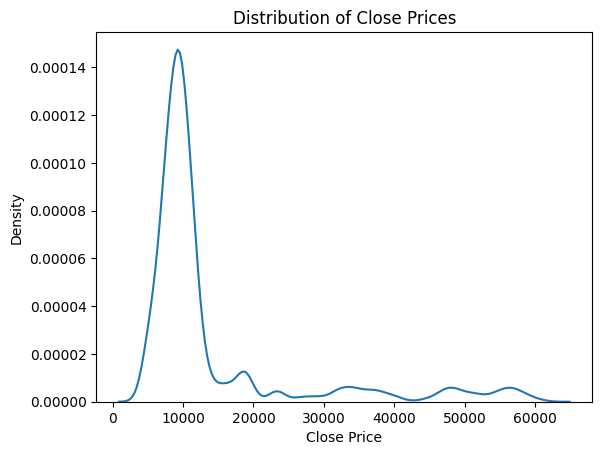

In [18]:
sns.kdeplot(test_data['Close'])
plt.xlabel('Close Price')
plt.title('Distribution of Close Prices')
plt.show()

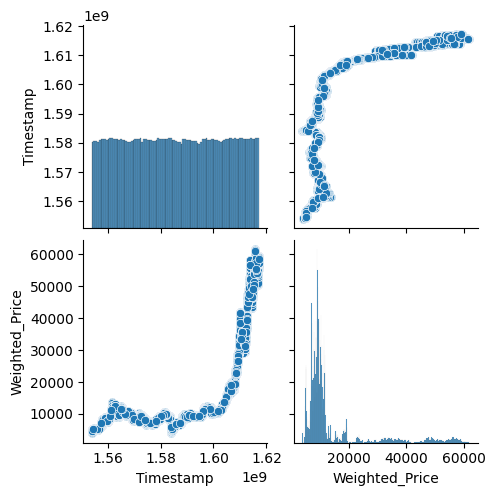

In [17]:
sns.pairplot(train_data[['Timestamp', 'Weighted_Price']])
plt.show()

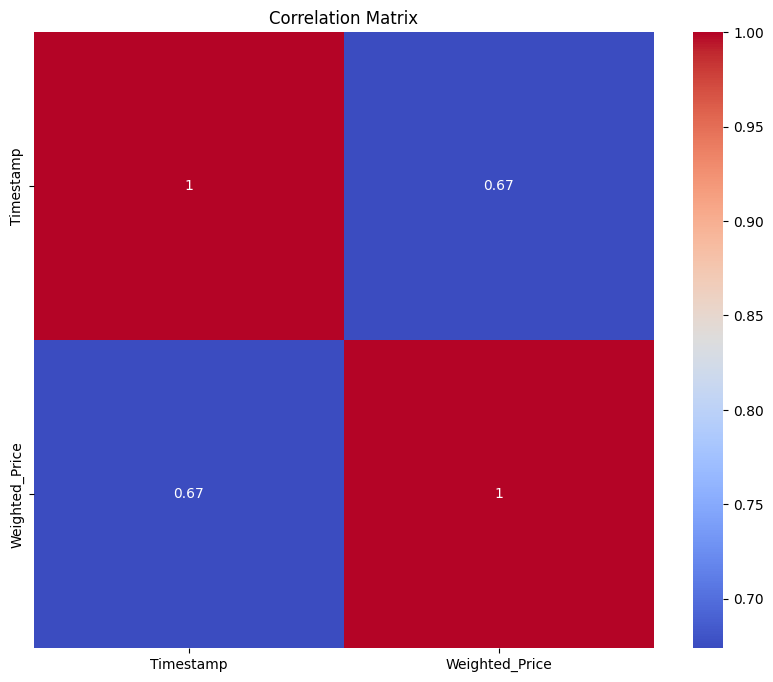

In [14]:
# Calculate correlation matrix
correlation_matrix = train_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Decision Trees

Import necessary libraries

In [50]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

Loading the dataset

In [68]:
train_data = pd.read_csv('/content/hackathon_train_data.csv')
test_data = pd.read_csv('/content/hackathon_test_data.csv')
test_output = pd.read_csv('/content/hackathon_testoutput.csv')

Removing the NaN values

In [69]:
train_data = train_data[['Timestamp', 'Weighted_Price']].dropna()

1. X_train and y_train are created by extracting the 'Timestamp' and 'Weighted_Price' columns from the train_data dataframe, respectively.
2. Similarly, X_test and y_test are created by extracting the 'Timestamp' and 'Weighted_Price' columns from the test_data and test_output dataframes, respectively.
3. The 'Timestamp' values are reshaped to a single feature column using .reshape(-1, 1) for both training and testing datasets.


In [70]:
X_train = train_data['Timestamp'].values.reshape(-1, 1)
y_train = train_data['Weighted_Price'].values

X_test = test_data['Timestamp'].values.reshape(-1, 1)
y_test = test_output['Weighted_Price'].values

In [71]:
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Fit the model
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the R2 score
r2 = metrics.r2_score(y_test, y_pred)


In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 11.275303932792196
Mean Squared Error: 683.3364193063838
Root Mean Squared Error: 26.14070426186685
R2 Score: 0.999995539555317


#Random Forest



Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

Loading the dataset

In [3]:
train_data = pd.read_csv('/content/hackathon_train_data.csv')
test_data = pd.read_csv('/content/hackathon_test_data.csv')
test_output = pd.read_csv('/content/hackathon_testoutput.csv')

Splitting the data into training and testing set


In [4]:
train_data = train_data[['Timestamp', 'Weighted_Price']].dropna()

X_train = train_data['Timestamp'].values.reshape(-1, 1)
y_train = train_data['Weighted_Price'].values

X_test = test_data['Timestamp'].values.reshape(-1, 1)
y_test = test_output['Weighted_Price'].values[:len(X_test)]


Data imputed with mean, evaluating random forest models and selecting best performing model based on R^2 score.

In [5]:
imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)

n_estimators_to_try = [10]

best_r2 = 0
best_model = None

for n_estimators in n_estimators_to_try:
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_model = model



In [6]:
y_pred = best_model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Best R2 Score:', best_r2)

Mean Absolute Error: 10.57396940186153
Mean Squared Error: 601.5111709168968
Root Mean Squared Error: 24.525724676691958
Best R2 Score: 0.9999960736655792
